In [1]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [2]:
def build_dot_size_matrix(grid_size_x, grid_size_y, dot_size_range, step_size=2):
    matrix = [[0 for _ in range(grid_size_x)] for _ in range(grid_size_y)]
    for i in range(grid_size_x):        #rows
        for j in range(grid_size_y):    #cols
            if (i == 0) and (j == 0):
                matrix[i][j] = random.randint(min(dot_size_range), max(dot_size_range)/2)
            elif (i == 0):
                val = matrix[i][j-1]
                if val <= step_size:
                    matrix[i][j] = val - random.randint(-step_size, val - 1)
                else:
                    matrix[i][j] = val - random.randint(-step_size, step_size)
            elif j == 0:
                val = matrix[i-1][j]
                if val <= step_size:
                    matrix[i][j] = val - random.randint(-step_size, val - 1)
                else:
                    matrix[i][j] = val - random.randint(-step_size, step_size)
            else:
                val_above = matrix[i-1][j]
                val_left = matrix[i][j-1]
                matrix[i][j]= random.randint(min(val_left, val_above), max(val_left, val_above))
    return matrix

def dots(grid_size_x, grid_size_y, mat):
    dots = []
    for x in range(grid_size_x):
        for y in range(grid_size_y):
            dots.append((x, y, mat[x][y]))
    return dots

def plot_grid_overlay(mat1, mat2, grid_size_x, grid_size_y, linewidth=0.5, alpha=0.5, fill='none', col1='red', col2='blue', lim=0):
    
    plt.figure(figsize=(8, 8))

    dot_sizes1 = dots(grid_size_x, grid_size_y, mat1)
    dot_sizes2 = dots(grid_size_x, grid_size_y, mat2)

    if fill == 1: col = col1
    else: col = "none"
    for i in dot_sizes1:
        x, y, size = i
        if (x <= lim) or (x >= grid_size_x - lim): 
            pass
        else:
            plt.scatter(
                x, y, s=size, 
                color=col1, marker='o', facecolors=col, 
                linewidths=linewidth, alpha=alpha
            )

    if fill == 1: col = col2
    else: col = "none"
    for i in dot_sizes2:
        x, y, size = i
        if (x <= lim) or (x >= grid_size_x - lim): 
            pass
        else:
            plt.scatter(
                x, y, s=size, 
                color=col2, marker='o', facecolors=col, 
                linewidths=linewidth, alpha=alpha
            )

    plt.xlim(lim, grid_size_x-lim)
    plt.ylim(-1, grid_size_y)
    plt.axis('off') 
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [13]:
grid_size_x = grid_size_y = 75
dot_size_range = (1, 10) 
step_size = 5
lim = 8
num_plots = 8
col1="#ffc876" # #FF9800
col2="#EE578a" # #f8bbd0

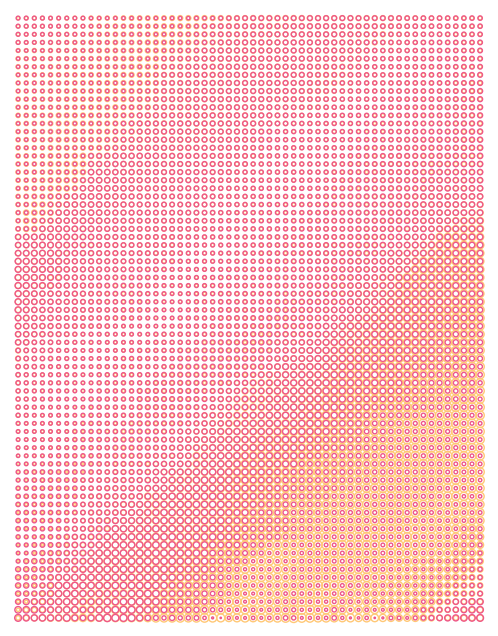

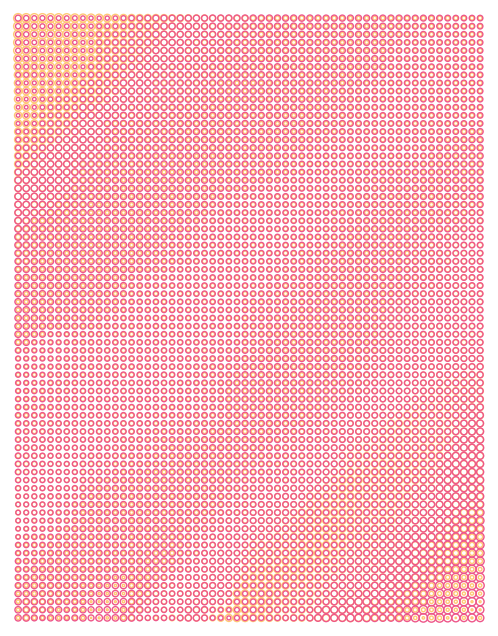

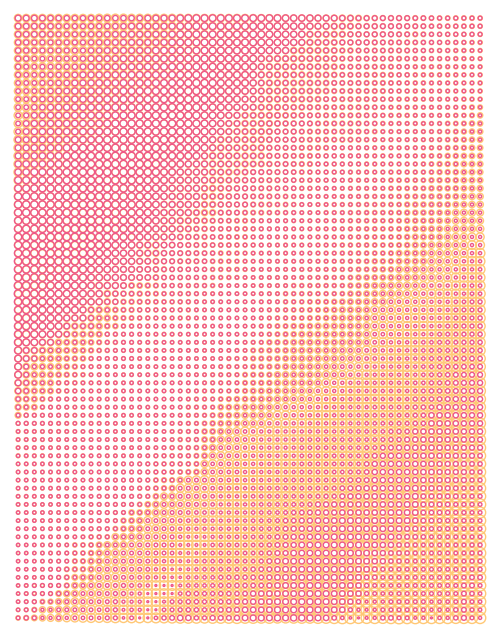

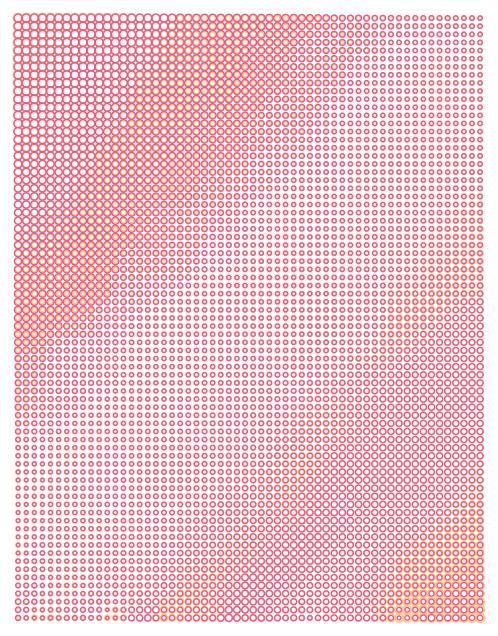

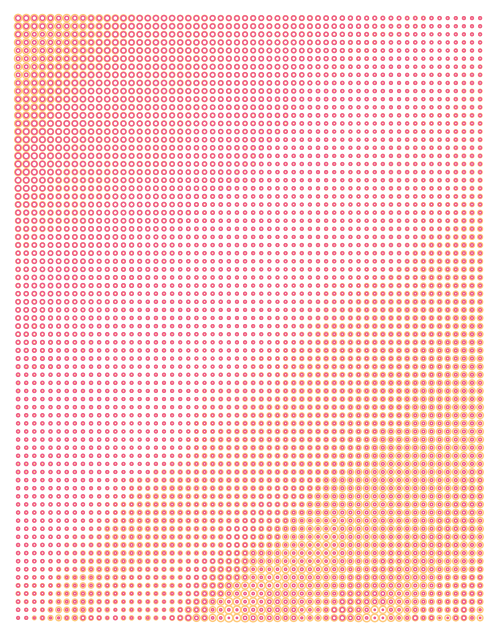

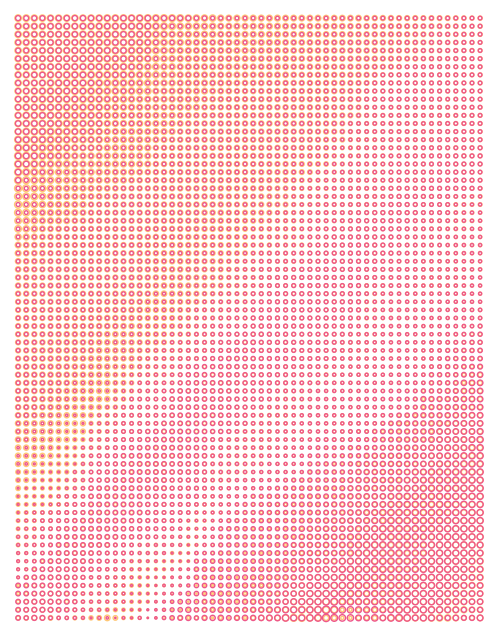

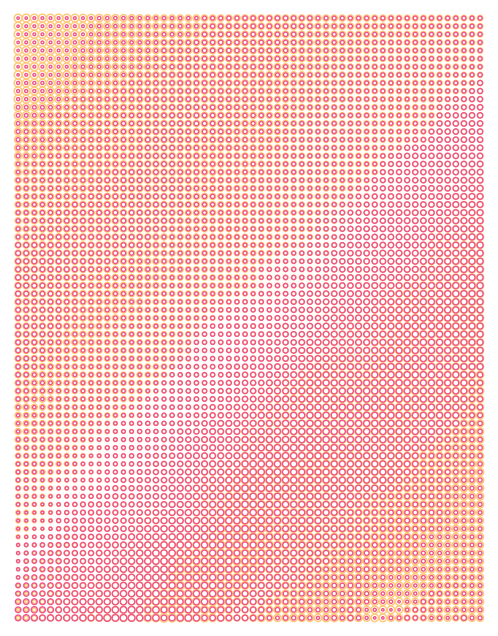

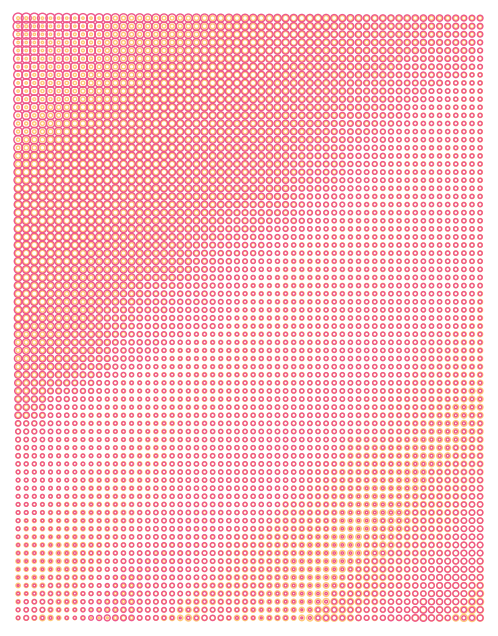

In [14]:
for i in range(num_plots): 
    mat1 = build_dot_size_matrix(grid_size_x, grid_size_y, dot_size_range, step_size=5)
    mat2 = build_dot_size_matrix(grid_size_x, grid_size_y, dot_size_range, step_size=5)
    plot_grid_overlay(mat1, mat2, grid_size_x, grid_size_y, linewidth=1, alpha=1, col1=col1, col2=col2, lim=lim)